<a href="https://colab.research.google.com/github/zealair12/CV-for-OCR---PwC/blob/main/Copy_of_Resume_Parser_with_PyMuPDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resume Parser with PyMuPDF

## Step 1: Setup Environment

In [1]:
!pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 24.8 MB/s eta 0:00:00


Upload resume File

In [18]:
from google.colab import files
uploaded = files.upload()

Saving sample_resume.pdf to sample_resume.pdf


In [19]:
import os
print(os.listdir())


['.config', '.ipynb_checkpoints', 'sample_resume.pdf', 'sample_data']


## Step 2: Inspecting the PDF

In [20]:
import fitz

In [22]:
# Load the PDF
doc = fitz.open("sample_resume.pdf")


# Print the number of pages
print(f"Total Pages: {doc.page_count}")


# Print metadata
print("PDF Metadata:")

doc.metadata


Total Pages: 1
PDF Metadata:


{'format': 'PDF 1.5',
 'title': 'Computer_Science_Resume.docx',
 'author': 'Chai Baweja',
 'subject': '',
 'keywords': 'resume, cv, latest',
 'creator': 'Chai Extern',
 'producer': '',
 'creationDate': "D:20240512060000+02'00'",
 'modDate': "D:20240619060000+02'00'",
 'trapped': '',
 'encryption': None}

## Step 3: Extracting Text from a PDF

### Extracting Raw Text from a Page

In [24]:
# Open the first page of the document
page = doc[0]

# Extract text as a plain string
text = page.get_text("text")

# Print the extracted text
print(text)

YOUR NAME
123-456-7890 – Hammond, LA – github.com/yourname – linkedin.com/yourname
SUMMARY OF QUALIFICATIONS
▪
Project management and consulting experience primarily focused upon nonprofit projects, requiring quick
turnarounds and extensive troubleshooting
▪
Proven skills in planning, strategy development, and knowledge of customer and client business processes
▪
Excellent team-building and management skills with demonstrated success
EDUCATION
Southeastern Louisiana University (SLU)
Hammond, LA
Bachelor of Science in Computer Science
May 2021
Thesis: Computerized Enrollment and Student Information Systems
▪
Major GPA: 3.84/4.00
▪
Taylor Opportunity Program for Students Scholarship
TECHNICAL SKILLS
▪
Programming Languages:  Visual Basic, SQL, C, C++, Java
▪
Operating Systems:  Windows NT/ 2000/ XP/ Vista, Linux, Unix
▪
Database:  SQL Server, Microsoft (MS) Access, Oracle
▪
Software:  JCL, SQL, DB2, MS Visio, MS Excel, MS FrontPage, MS Word
RELATED EXPERIENCE
Blog Writer
Hammond, LA
SLU 

### Extracting Text with Bounding Box Positions

In [25]:
# Extract words along with bounding box information
words = page.get_text("words")

# Print first 5 extracted words with bounding boxes
for word in words[:5]:
    print(word)

(36.0, 36.5234375, 82.21542358398438, 54.3984375, 'YOUR', 0, 0, 0)
(86.65953063964844, 36.5234375, 133.76014709472656, 54.3984375, 'NAME', 0, 0, 1)
(196.5922088623047, 41.955078125, 258.843994140625, 53.126953125, '123-456-7890', 0, 1, 0)
(261.62060546875, 41.955078125, 267.18060302734375, 53.126953125, '–', 0, 1, 1)
(269.95721435546875, 41.955078125, 321.6097412109375, 53.126953125, 'Hammond,', 0, 1, 2)


### Extracting Text Block-by-Block (Paragraph-Level)

In [26]:
# Extract structured text as blocks
blocks = page.get_text("blocks")

# Print each block
for block in blocks:
    print(f"Block: {block}")

Block: (36.0, 36.5234375, 576.0006713867188, 54.3984375, 'YOUR NAME\n123-456-7890 – Hammond, LA – github.com/yourname – linkedin.com/yourname\n', 0, 0)
Block: (36.0, 77.7236328125, 190.7513885498047, 88.8955078125, 'SUMMARY OF QUALIFICATIONS\n', 1, 0)
Block: (54.0, 90.72265625, 544.3032836914062, 136.3916015625, '▪\nProject management and consulting experience primarily focused upon nonprofit projects, requiring quick\nturnarounds and extensive troubleshooting\n▪\nProven skills in planning, strategy development, and knowledge of customer and client business processes\n▪\nExcellent team-building and management skills with demonstrated success\n', 2, 0)
Block: (36.0, 145.91796875, 575.6719360351562, 193.0869140625, 'EDUCATION\nSoutheastern Louisiana University (SLU)\nHammond, LA\nBachelor of Science in Computer Science\nMay 2021\nThesis: Computerized Enrollment and Student Information Systems\n', 3, 0)
Block: (54.0, 193.4140625, 305.9080505371094, 216.0849609375, '▪\nMajor GPA: 3.84/4.00

## Step 4: Extracting Text from All Pages in a PDF

In [27]:
# Loop through all pages and extract text
for page_num in range(len(doc)):
    page = doc[page_num]
    text = page.get_text("text")
    print(f"--- Page {page_num + 1} ---")
    print(text)

--- Page 1 ---
YOUR NAME
123-456-7890 – Hammond, LA – github.com/yourname – linkedin.com/yourname
SUMMARY OF QUALIFICATIONS
▪
Project management and consulting experience primarily focused upon nonprofit projects, requiring quick
turnarounds and extensive troubleshooting
▪
Proven skills in planning, strategy development, and knowledge of customer and client business processes
▪
Excellent team-building and management skills with demonstrated success
EDUCATION
Southeastern Louisiana University (SLU)
Hammond, LA
Bachelor of Science in Computer Science
May 2021
Thesis: Computerized Enrollment and Student Information Systems
▪
Major GPA: 3.84/4.00
▪
Taylor Opportunity Program for Students Scholarship
TECHNICAL SKILLS
▪
Programming Languages:  Visual Basic, SQL, C, C++, Java
▪
Operating Systems:  Windows NT/ 2000/ XP/ Vista, Linux, Unix
▪
Database:  SQL Server, Microsoft (MS) Access, Oracle
▪
Software:  JCL, SQL, DB2, MS Visio, MS Excel, MS FrontPage, MS Word
RELATED EXPERIENCE
Blog Writer
H

## Step 5: Extracting Key Information from a PDF

In [38]:
import re

# Extract raw text from the first page
text = doc[0].get_text("text")

# Use regex to find a phone number in the text
# Regex - Regular Expressions
phone_match = re.search(r"\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}", text)

if phone_match:
    phone_number = phone_match.group()
    print(f"Candidate Phone Number: {phone_number}")
else:
    print("Phone number not found.")

# Regex pattern for validating an email

# Search for an email in the text
github_pattern = re.search(r"(?:https?://)?(www\.)?github\.com/[a-zA-Z0-9_-]+/?", text)

if github_pattern:
    github = github_pattern.group()
    print(f"Found github: {github}")
else:
    print("No github found.")

Candidate Phone Number: 123-456-7890
Found github: github.com/yourname


## Step 6: Extracting Bounding Boxes for Specific Fields

In [41]:
# Extract words with their bounding boxes
words = doc[0].get_text("words")

# Define the field we are looking for
# target_word = phone_number
target_word = github

# Search for the target word and retrieve its bounding box
for word in words:
    x0, y0, x1, y1, text, block, line, word_no = word  # Unpack correctly
    if target_word.lower() in text.lower():  # Case-insensitive match
        print(f"Found '{target_word}' at: ({x0}, {y0}, {x1}, {y1})")

Found 'github.com/yourname' at: (348.451904296875, 41.955078125, 452.8649597167969, 53.126953125)


Found '123-456-7890' at: (196, 53, 258, 41)


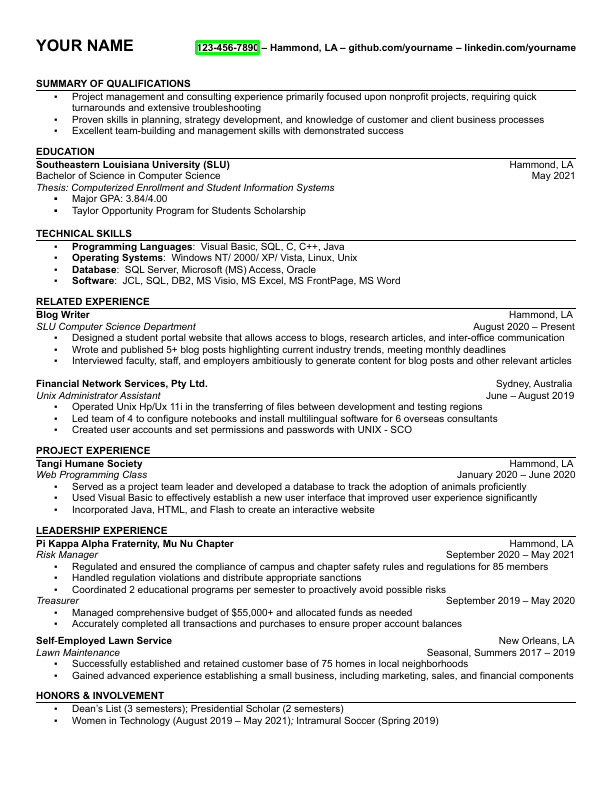

In [42]:
import cv2
import numpy as np
from PIL import Image

# Convert PDF page to an image
pix = doc[0].get_pixmap()
img = np.array(Image.frombytes("RGB", [pix.width, pix.height], pix.samples))

# Convert image to OpenCV BGR format
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# Get the actual image height
img_height = img.shape[0]  # OpenCV uses (height, width, channels)

# Extract words and their bounding boxes
words = doc[0].get_text("words")

# Define the field we are looking for
target_word = "123-456-7890"  # Replace with actual phone number

# Flag to check if the word was found
word_found = False

# Search for the target word and retrieve its bounding box
for word in words:
    x0, y0, x1, y1, text, block, line, word_no = word  # Unpack correctly

    if target_word in text:  # Case-sensitive match (modify if needed)
        # Convert PyMuPDF's y-coordinates (bottom-left origin) to OpenCV's (top-left origin)
        y0_new = y1  # Convert bottom-left to top-left
        y1_new = y0  # Convert bottom-left to top-left

        # Convert coordinates to integers
        x0, y0_new, x1, y1_new = map(int, [x0, y0_new, x1, y1_new])

        # Draw a rectangle around the detected word
        cv2.rectangle(img, (x0, y0_new), (x1, y1_new), (0, 255, 0), 2)

        print(f"Found '{target_word}' at: ({x0}, {y0_new}, {x1}, {y1_new})")
        word_found = True

# Ensure an image is displayed even if no word is found
if not word_found:
    print(f"'{target_word}' not found in document.")

# Convert back to RGB for displaying in PIL
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using PIL (works in Jupyter/Colab)
display(Image.fromarray(img_rgb))

In [44]:
Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)).show()